## Import Libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Data

In [34]:
content = pd.read_csv('Content.csv')
location = pd.read_csv('Location.csv')
profile = pd.read_csv('Profile.csv')
reactions = pd.read_csv('Reactions.csv')
reaction_types = pd.read_csv('ReactionTypes.csv')
session = pd.read_csv('Session.csv')
user = pd.read_csv('User.csv')

## Exploring Data

In [35]:
reactions = reactions.dropna()
reactions = reactions.drop('Unnamed: 0', axis = 1)
reactions['Type'].unique()


array(['disgust', 'dislike', 'scared', 'interested', 'peeking', 'cherish',
       'hate', 'indifferent', 'super love', 'worried', 'like', 'heart',
       'want', 'intrigued', 'love', 'adore'], dtype=object)

In [36]:
reaction_types = reaction_types.dropna()
reaction_types = reaction_types.drop('Unnamed: 0', axis = 1)
reaction_types

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


In [37]:
content = content[['Content ID', 'Type', 'Category']]
content = content.dropna()
content.rename(columns = {'Type': 'Content Type'}, inplace = True)
content['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

## Cleaning Data

In [38]:
content['Category'].replace(['studying', '"studying"', 'healthy eating', 'technology', '"technology"', 'food', 'cooking', 'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel', 'fitness', 'education', 'veganism', 'animals', 'culture', '"culture"', '"tennis"', '"food"', '"cooking"', '"public speaking"', '"veganism"', '"science"', '"animals"', '"soccer"', '"dogs"'], 
    ['Studying', 'Studying', 'Healthy Eating', 'Technology', 'Technology', 'Food', 'Cooking', 'Dogs', 'Soccer', 'Public Speaking', 'Science', 'Tennis', 'Travel', 'Fitness', 'Education', 'Veganism', 'Animals', 'Culture', 'Culture', 'Tennis', 'Food', 'Cooking', 'Public Speaking', 'Veganism', 'Science', 'Animals', 'Soccer', 'Dogs'], inplace = True)

content['Category'].unique()

array(['Studying', 'Healthy Eating', 'Technology', 'Food', 'Cooking',
       'Dogs', 'Soccer', 'Public Speaking', 'Science', 'Tennis', 'Travel',
       'Fitness', 'Education', 'Veganism', 'Animals', 'Culture'],
      dtype=object)

## Merging Data

In [39]:
reactions_with_scoring = reactions.merge(reaction_types, how = 'left')
reactions_with_scoring

,Content ID,User ID,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30
...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,b6d04982-1509-41ab-a700-b390d6cb4d02,worried,2020-10-31 04:50:14,negative,12
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48,negative,10
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02,positive,45
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31,negative,12


In [40]:
reactions_with_scoring_and_content_info = reactions_with_scoring.merge(content, on = 'Content ID')
reactions_with_scoring_and_content_info

,Content ID,User ID,Type,Datetime,Sentiment,Score,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30,photo,Studying
...,...,...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,b6d04982-1509-41ab-a700-b390d6cb4d02,worried,2020-10-31 04:50:14,negative,12,audio,Technology
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48,negative,10,audio,Technology
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02,positive,45,audio,Technology
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31,negative,12,audio,Technology


## Reorganizing Columns


In [41]:
reactions_with_scoring_and_content_info.rename(columns = {'Type': 'Reaction Type'}, inplace = True)
reactions_with_scoring_and_content_info = reactions_with_scoring_and_content_info[['Content ID', 'Reaction Type', 'Datetime', 'User ID', 'Content Type', 'Category', 'Sentiment', 'Score']]
reactions_with_scoring_and_content_info

,Content ID,Reaction Type,Datetime,User ID,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,5d454588-283d-459d-915d-c48a2cb4c27f,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,92b87fa5-f271-43e0-af66-84fac21052e6,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,163daa38-8b77-48c9-9af6-37a6c1447ac2,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,34e8add9-0206-47fd-a501-037b994650a2,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,photo,Studying,positive,30
...,...,...,...,...,...,...,...,...
22529,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-10-31 04:50:14,b6d04982-1509-41ab-a700-b390d6cb4d02,audio,Technology,negative,12
22530,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,audio,Technology,negative,10
22531,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,2bd9c167-e06c-47c1-a978-3403d6724606,audio,Technology,positive,45
22532,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,audio,Technology,negative,12


## Write to CSV

In [42]:
reactions_with_scoring_and_content_info.to_csv('final_data.csv')

## Making Visualizations

In [43]:
# rename dataframe
data = reactions_with_scoring_and_content_info

### Sentiments based on content type

In [44]:
photo_data = data[data['Content Type'] == 'photo']
video_data = data[data['Content Type'] == 'video']
gif_data = data[data['Content Type'] == 'GIF']
audio_data = data[data['Content Type'] == 'audio']

labels = ['Positive', 'Negative', 'Neutral']

photo_data

,Content ID,Reaction Type,Datetime,User ID,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,5d454588-283d-459d-915d-c48a2cb4c27f,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,92b87fa5-f271-43e0-af66-84fac21052e6,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,163daa38-8b77-48c9-9af6-37a6c1447ac2,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,34e8add9-0206-47fd-a501-037b994650a2,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,photo,Studying,positive,30
...,...,...,...,...,...,...,...,...
22435,c54b49c4-b1f2-4641-8595-1cbd19937845,love,2020-12-12 21:17:55,a94a7d87-65df-4c21-847a-0e8af6cb5c02,photo,Science,positive,65
22436,c54b49c4-b1f2-4641-8595-1cbd19937845,disgust,2021-04-02 18:59:44,69f2735b-eee6-4fc1-a934-b31c20beb780,photo,Science,negative,0
22437,c54b49c4-b1f2-4641-8595-1cbd19937845,want,2020-09-17 02:27:46,af647535-dae8-4ca3-9203-bf4bfc607ffe,photo,Science,positive,70
22438,c54b49c4-b1f2-4641-8595-1cbd19937845,heart,2020-06-30 04:11:55,b870b764-7447-4990-a8d4-024d33e0e67d,photo,Science,positive,60


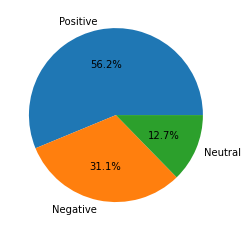

In [45]:
plt.pie(photo_data['Sentiment'].value_counts(), labels = labels, autopct='%0.1f%%')
plt.show()

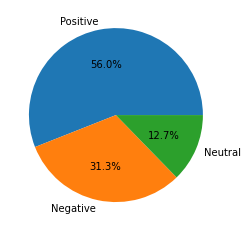

In [46]:
plt.pie(video_data['Sentiment'].value_counts(), labels = labels, autopct='%0.1f%%')
plt.show()

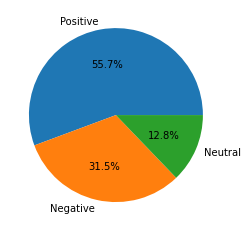

In [47]:
plt.pie(gif_data['Sentiment'].value_counts(), labels = labels, autopct='%0.1f%%')
plt.show()

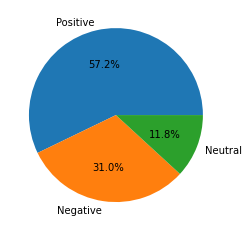

In [48]:
plt.pie(audio_data['Sentiment'].value_counts(), labels = labels,  autopct='%0.1f%%')
plt.show()

### Average score based on category

In [49]:
avg_scores = dict()

for category in data['Category'].unique():
    avg_scores[category] = data[data['Category'] == category]['Score'].mean()

avg_scores = dict(sorted(avg_scores.items(), key = lambda x: x[1]))
avg_scores

{'Tennis': 37.91871921182266,
 'Cooking': 38.802622950819675,
 'Travel': 39.309933774834434,
 'Culture': 39.442782834850455,
 'Dogs': 39.4441727791361,
 'Animals': 39.484464902186424,
 'Studying': 39.521982414068745,
 'Food': 39.587403598971726,
 'Fitness': 39.5911214953271,
 'Science': 39.73572296476306,
 'Soccer': 39.74309185959672,
 'Veganism': 40.053228621291446,
 'Healthy Eating': 40.16412213740458,
 'Education': 40.24332570556827,
 'Technology': 40.48490687219011,
 'Public Speaking': 40.99551971326165}

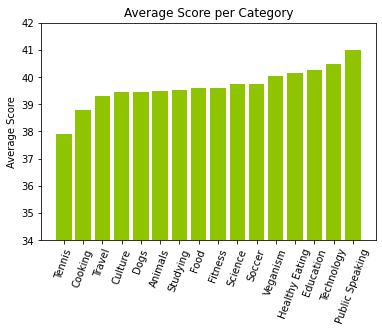

In [80]:
plt.bar(avg_scores.keys(), avg_scores.values(), color = '#8ec400')
plt.title('Average Score per Category')
plt.ylabel('Average Score')
plt.xticks(rotation='70')
plt.ylim(34, 42)
plt.show()

### Barchart showing total score per month

In [51]:
data['Datetime'] = data['Datetime'].astype('datetime64[ns]')
monthly_scores = data.groupby(data.Datetime.dt.to_period('M'))['Score'].sum()

# converting dates to word format
monthly_scores = {monthly_scores.keys()[i].to_timestamp().strftime('%b %Y'): monthly_scores.get(i) for i in range(0, monthly_scores.size)} 
monthly_scores

{'Jun 2020': 31902,
 'Jul 2020': 75281,
 'Aug 2020': 75227,
 'Sep 2020': 73370,
 'Oct 2020': 75969,
 'Nov 2020': 75770,
 'Dec 2020': 75623,
 'Jan 2021': 76343,
 'Feb 2021': 68993,
 'Mar 2021': 72829,
 'Apr 2021': 72141,
 'May 2021': 78972,
 'Jun 2021': 41062}

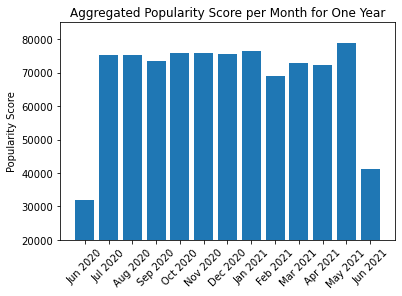

In [67]:
plt.bar(monthly_scores.keys(), monthly_scores.values())
plt.title('Aggregated Popularity Score per Month for One Year')
plt.ylabel('Popularity Score')
plt.xticks(rotation='45')
plt.ylim(20000, 85000)

plt.show()

### Number of posts per category

In [53]:
category_counts = dict()

for category in data['Category'].unique():
    category_counts[category] = data[data['Category'] == category]['Score'].size

category_counts = dict(sorted(category_counts.items(), key = lambda x: x[1]))
category_counts

{'Public Speaking': 1116,
 'Veganism': 1146,
 'Tennis': 1218,
 'Dogs': 1227,
 'Studying': 1251,
 'Fitness': 1284,
 'Education': 1311,
 'Soccer': 1339,
 'Travel': 1510,
 'Cooking': 1525,
 'Culture': 1538,
 'Food': 1556,
 'Technology': 1557,
 'Healthy Eating': 1572,
 'Science': 1646,
 'Animals': 1738}

### Aggregated scores per category

In [62]:
# category_scores = data.groupby(data.Datetime.dt.to_period('M'))['Score'].sum()
category_scores = data.groupby('Category')['Score'].sum()

category_scores  = {category_scores .keys()[i]: category_scores.get(i) for i in range(0, category_scores.size)} 
category_scores = dict(sorted(category_scores.items(), key = lambda x: x[1]))

top_5 = {list(category_scores.keys())[i]: list(category_scores.values())[i] for i in range(len(category_scores) - 1, 10,-1)}
top_5 

{'Animals': 68624,
 'Science': 65405,
 'Healthy Eating': 63138,
 'Technology': 63035,
 'Food': 61598}

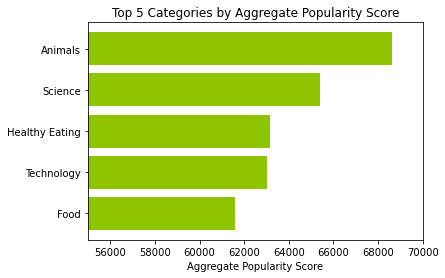

In [63]:
fig, ax = plt.subplots()
y_pos = np.arange(len(top_5.keys()))

ax.barh(y_pos, top_5.values(), align = 'center', color = '#8ec400')

ax.set_yticks(y_pos, labels=top_5.keys())
ax.invert_yaxis()
ax.set_xlabel('Aggregate Popularity Score')
ax.set_title('Top 5 Categories by Aggregate Popularity Score')
plt.xlim(55000, 70000)
#plt.savefig('top_aggregate_score.png')
plt.show()

### Pie chart of top 5 categories

In [56]:
top_5 = {list(category_counts.keys())[i]: list(category_counts.values())[i] for i in range(len(category_counts) - 1, 10,-1)}
top_5

{'Animals': 1738,
 'Science': 1646,
 'Healthy Eating': 1572,
 'Technology': 1557,
 'Food': 1556}

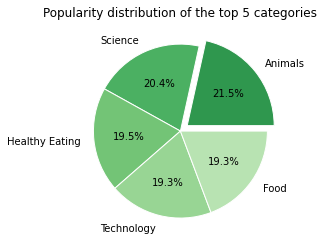

In [57]:
colors = plt.get_cmap('Greens')(np.linspace(0.7, 0.3, len(top_5.keys())))
explode = [0.1, 0, 0, 0, 0]

plt.pie(top_5.values(), colors = colors, labels = top_5.keys(), wedgeprops={"linewidth": 1, "edgecolor": "white"}, explode = explode, autopct='%0.1f%%', labeldistance = 1.15)
plt.title('Popularity distribution of the top 5 categories')
plt.show()


### Finding number of posts per month

In [58]:
monthly_posts = data.groupby(data.Datetime.dt.to_period('M'))['Score'].count()
monthly_posts = {monthly_posts.keys()[i].to_timestamp().strftime('%b %Y'): monthly_posts.get(i) for i in range(0, monthly_posts.size)} 

monthly_posts

{'Jun 2020': 808,
 'Jul 2020': 1884,
 'Aug 2020': 1945,
 'Sep 2020': 1862,
 'Oct 2020': 1889,
 'Nov 2020': 1866,
 'Dec 2020': 1941,
 'Jan 2021': 1949,
 'Feb 2021': 1750,
 'Mar 2021': 1857,
 'Apr 2021': 1801,
 'May 2021': 1954,
 'Jun 2021': 1028}

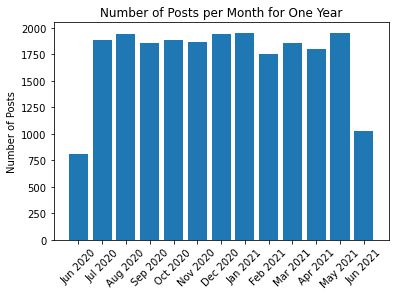

In [59]:
plt.bar(monthly_posts.keys(), monthly_posts.values())
plt.title('Number of Posts per Month for One Year')
plt.ylabel('Number of Posts')
plt.xticks(rotation='45')

plt.show()

### Sentiment breakdown by top categories

In [71]:
animal_posts = data[data['Category'] == 'Animals']
science_posts = data[data['Category'] == 'Science']

labels = ['Positive', 'Negative', 'Neutral']

animal_posts

,Content ID,Reaction Type,Datetime,User ID,Content Type,Category,Sentiment,Score
834,07f88a73-aef2-45fd-8b5d-418e448b853d,cherish,2021-03-12 16:22:28,7d8c8c77-77a8-4743-b35f-349c0ac07866,GIF,Animals,positive,70
835,07f88a73-aef2-45fd-8b5d-418e448b853d,intrigued,2020-10-17 10:20:24,6e9c7f30-264a-4aa0-b3ac-36e852d10906,GIF,Animals,positive,45
836,07f88a73-aef2-45fd-8b5d-418e448b853d,like,2020-12-19 16:42:35,2941011b-f214-4430-8a14-e791ed0805bb,GIF,Animals,positive,50
837,07f88a73-aef2-45fd-8b5d-418e448b853d,love,2021-05-31 05:46:59,d1a89d23-7d17-4949-9e1a-637317141f3d,GIF,Animals,positive,65
838,07f88a73-aef2-45fd-8b5d-418e448b853d,hate,2020-12-27 03:37:01,8665a934-dc22-482b-9289-2e2c9d6a4095,GIF,Animals,negative,5
...,...,...,...,...,...,...,...,...
22347,89cb4504-fccd-40f4-945e-410f74ee4735,scared,2021-04-05 00:52:42,b827588c-31b2-47f3-916a-a1dbf7987f50,photo,Animals,negative,15
22348,89cb4504-fccd-40f4-945e-410f74ee4735,super love,2020-10-30 16:30:15,6ecb39b1-8f85-44f1-b2f3-0cffcba4d731,photo,Animals,positive,75
22349,89cb4504-fccd-40f4-945e-410f74ee4735,hate,2021-04-01 18:09:07,07f4dcd0-2bf3-4f21-9da3-b054b511ae00,photo,Animals,negative,5
22350,89cb4504-fccd-40f4-945e-410f74ee4735,love,2020-08-16 03:02:19,9dcb5fd8-9e7f-40d3-bd1d-edf33ecf6388,photo,Animals,positive,65


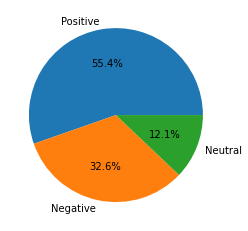

In [69]:
plt.pie(animal_posts['Sentiment'].value_counts(), labels = labels, autopct='%0.1f%%')
plt.show()

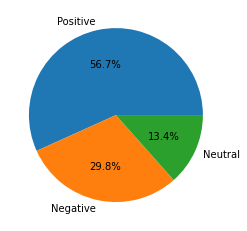

In [72]:
plt.pie(science_posts['Sentiment'].value_counts(), labels = labels, autopct='%0.1f%%')
plt.show()